In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import warnings
from scipy import stats

warnings.simplefilter("ignore")

class Process:
    def show(self):
        plt.plot(self.show_x,self.show_y)
    def at(self,t):
        if t in self.dic:
            return self.dic[t]
        else:
            return self.show_y[np.searchsorted(self.show_x, t)]


class Wiener(Process):
    def __init__(self, start, end,n):
        t = list(np.linspace(start,end,n+1))
        w =[0]
        sigma = math.sqrt(t[1]-t[0])
        for tn in t[:-1]:
            w.append(w[-1]+np.random.normal(0,sigma))
        self.start = start
        self.end = end
        self.t = t
        self.w = w
        self.dic =  dict(zip(t,w))
        self.show_x =  t
        self.show_y = w
        
        
class Solution(Process):
    def __init__(self,t,f,w):
        self.x = [f(tn,w) for tn in t]
        self.f = f
        self.w = w
        self.t = t
        self.dic = dict(zip(t,self.x))
        self.show_x =  t
        self.show_y = self.x
        
class Euler_Maruyama(Process):
    def __init__(self,a,b,x0,w,delta):
        t = list(np.arange(w.start,w.end+delta,delta))
        y =[x0]
        l = len(t)
        
        for i in range(l-1):
            y.append(y[-1]+a(t[i],y[-1])*(t[i+1]-t[i])+b(t[i],y[-1])*(w.at(t[i+1])-w.at(t[i])))

        self.t = t
        self.w = w
        self.a = a
        self.b = b
        self.x0 = x0
        self.delta = delta
        self.y = y
        self.dic = dict(zip(t,y))
        self.show_x =  t
        self.show_y = y




## PC-Exercise 9.2.1
区間[0,1]に於いて等間隔$\Delta = 2^{-2}$のオイラー近似を作成し,$dX_t = 1.5 X_t dt + 1.0 X_t dW_t ,\ X_0 =1.0$という確率微分方程式を近似せよ.

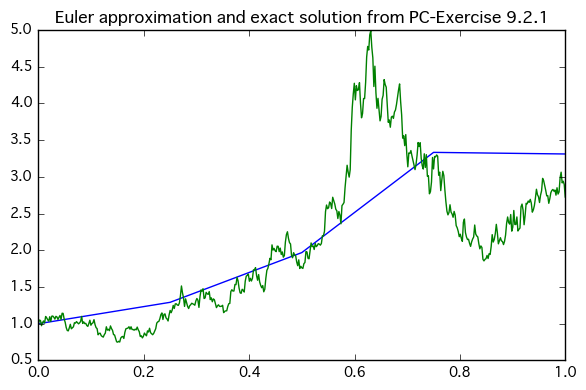

In [2]:
a921 = lambda t,x: 1.5*x
b921 = lambda t,x: 1.0*x
delta921 = 2**(-2)
x0_921 = 1.0
t0_921 = 0
t1_921 = 1

sol921 = lambda t,w: math.exp(t+w.at(t))

W = Wiener(t0_921,t1_921,2**9)
Y = Euler_Maruyama(a921,b921,x0_921,W,delta921)
X = Solution(W.t,sol921,W)

plt.title("Euler approximation and exact solution from PC-Exercise 9.2.1")
Y.show()
X.show()
plt.show()
plt.close()


## PC-Exercise 9.2.2
PC-Exercise 9.2.1を間隔を$\Delta  = 2^{-4}$にして繰り返せ.
    

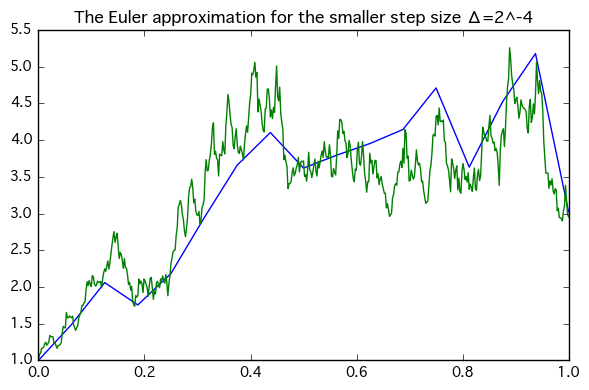

In [3]:
delta922 = 2**(-4)
W = Wiener(t0_921,t1_921,2**9)
Y = Euler_Maruyama(a921,b921,x0_921,W,delta922)
X = Solution(W.t,sol921,W)

plt.title("The Euler approximation for the smaller step size Δ=2^-4")

Y.show()
X.show()
plt.show()
plt.close()


## PC-Exercise 9.3.1
$dX_t = 1.5 X_t dt + 1.0 X_t dW_t ,\ X_0 =1.0$という$[0,1]$上の伊藤過程に対して$\Delta= 2^{-4}$の等間隔のオイラー近似を$N=25$回繰り返し,
統計的誤差$\hat{\epsilon}$を計算せよ.これを$\Delta . = 2^{-5} , 2^{-6}$ and $2^{-7} $についても繰り返し$\Delta$と $\hat{\epsilon}$の関係を示せ.


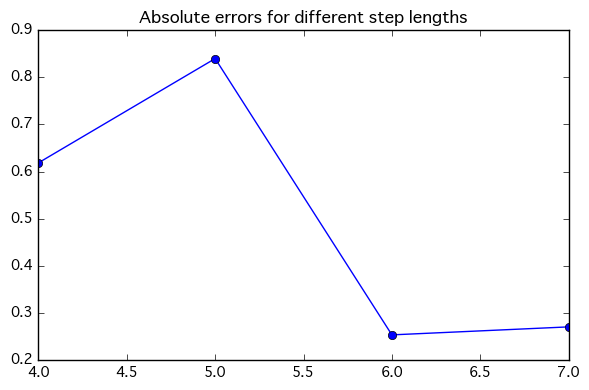

In [4]:
N931 = 100
Deltas = [2**(-4),2**(-5),2**(-6),2**(-7)]
LogDeltas = [4,5,6,7]
epsilons = []
for delta in Deltas:
    eps = []
    
    for i in range(N931):
        W = Wiener(t0_921,t1_921,2**9)
        Y = Euler_Maruyama(a921,b921,x0_921,W,delta)
        X = Solution(W.t,sol921,W)
        eps.append(math.fabs(X.at(1) - Y.at(1)))
        
    epsilons.append(np.mean(eps))

plt.title("Absolute errors for different step lengths")
plt.plot(LogDeltas,epsilons,"-o")
plt.show()
plt.close()

## PC-Exercise 9.3.3
$dX_t = 1.5 X_t dt + 0.1 X_t dW_t ,\ X_0 =1.0$という$[0,1]$上の伊藤過程に対して$\Delta= 2^{-4}$の等間隔のオイラー近似を$N=25$回繰り返し,
更にこれを$M=10$組繰り返すことによって,絶対誤差 $\epsilon$の90%信頼区間を図示せよ.
これを$M = 20, 40$ and $100$ についても繰り返し$\Delta$と $\epsilon$の信頼区間との関係を示せ.


10
20
40
100


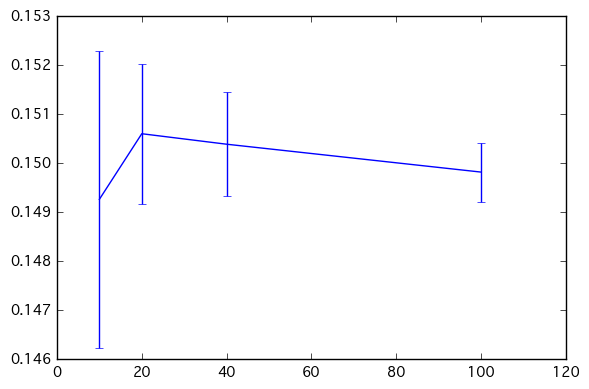

In [23]:
Ms = [10,20,40,100]
N  = 100
b933 = lambda t,x: 0.1*x
sol933 = lambda t,w: math.exp(1.495*t+0.1*w.at(t))

all_eps =[]
all_deltaeps =[]
for M in  Ms:
    print(M)
    epsilons =[]
    for i in range(M):
        eps = []
        for j in range(N):
            W = Wiener(t0_921,t1_921,2**9)
            Y = Euler_Maruyama(a921,b933,x0_921,W,delta)
            eps.append(math.fabs(sol933(1,W) - Y.at(1)))
        epsilons.append(np.mean(eps))
    all_eps.append(np.mean(epsilons))
    all_deltaeps.append(stats.t.ppf(1-(1-0.9)/2, M-1) * math.sqrt(np.var(epsilons)/M))

plt.errorbar(Ms,all_eps,yerr=all_deltaeps)
plt.xlim(0,120)
plt.show()
plt.close()


## PC-Exercise 9.3.4
$dX_t = 1.5 X_t dt + 0.1 X_t dW_t ,\ X_0 =1.0$という$[0,1]$上の伊藤過程に対して$\Delta= 2^{-2}$の等間隔のオイラー近似を$N=25$回繰り返し,
更にこれを$M=100$組繰り返すことによって,絶対誤差 $\epsilon$の90%信頼区間を図示せよ.これを,$\Delta . = 2^{-5} , 2^{-6}$ and $2^{-7} $についても繰り返し$\Delta$と $\epsilon$の関係を示せ.


0.5
0.25
0.125
0.0625
0.03125


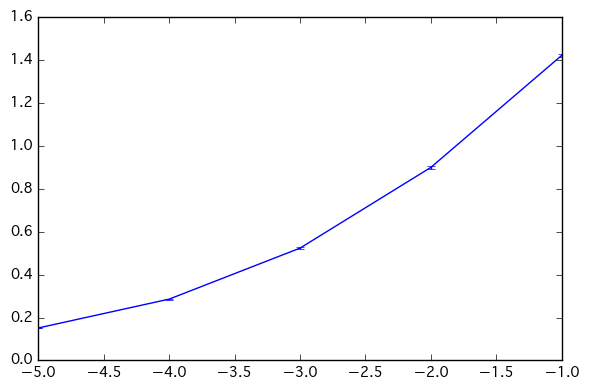

In [22]:
Deltas = [2**(-1),2**(-2),2**(-3),2**(-4),2**(-5)]
LogDeltas = [-1,-2,-3,-4,-5]
N  = 100
M = 20

all_eps =[]
all_deltaeps =[]
for delta in  Deltas:
    print(delta)
    epsilons =[]
    for i in range(M):
        eps = []
        for j in range(N):
            W = Wiener(t0_921,t1_921,2**10)
            Y = Euler_Maruyama(a921,b933,x0_921,W,delta)
            eps.append(math.fabs(sol933(1,W) - Y.at(1)))
        epsilons.append(np.mean(eps))
    all_eps.append(np.mean(epsilons))
    all_deltaeps.append(stats.t.ppf(1-(1-0.9)/2, M-1) * math.sqrt(np.var(epsilons)/M))



plt.errorbar(LogDeltas,all_eps,yerr=all_deltaeps)

plt.show()
plt.close()


## PC-Exercise 9.4.1
$dX_t = 1.5 X_t dt + 0.1 X_t dW_t ,\ X_0 =1.0$という$[0,1]$上の伊藤過程に対して$\Delta= 2^{-4}$の等間隔のオイラー近似を$N=100$回繰り返し,
更にこれを$M=20,40,100$組繰り返すことによって,平均の誤差 $\mu$の90%信頼区間を図示せよ.

10
20
40
100


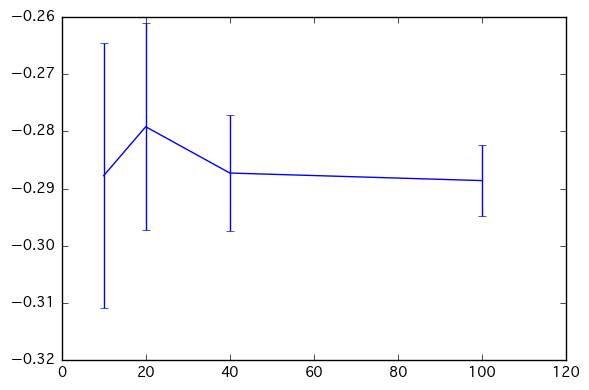

In [30]:
Ms = [10,20,40,100]
N  = 100
delta = 2**(-4)
mus =[]
delta_mu =[]

for M in  Ms:
    print(M)
    mu_j =[]
    for i in range(M):
        Y_t_j = []
        for j in range(N):
            W = Wiener(t0_921,t1_921,2**9)
            Y = Euler_Maruyama(a921,b933,x0_921,W,delta)
            Y_t_j.append(Y.at(1))
        mu_j.append(np.mean(Y_t_j)-math.exp(1.5))
    mus.append(np.mean(mu_j))
    delta_mu.append(stats.t.ppf(1-(1-0.9)/2, M-1) * math.sqrt(np.var(mu_j)/M))
                    
plt.errorbar(Ms,mus,yerr=delta_mu)
plt.xlim(0,120)
plt.show()
plt.close()

20
20
20
20
20


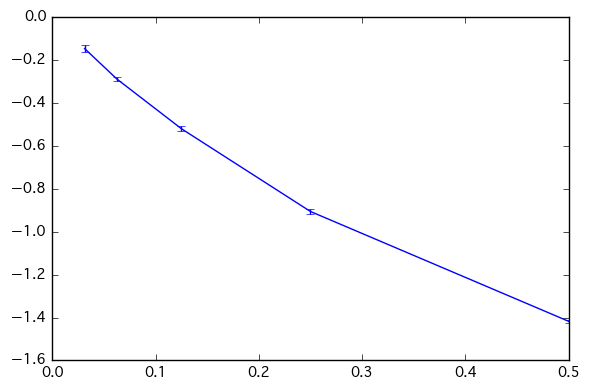

In [29]:
Deltas = [2**(-1),2**(-2),2**(-3),2**(-4),2**(-5)]
LogDeltas = [-1,-2,-3,-4,-5]
N  = 100
M = 20

mus =[]
delta_mu =[]

for delta in  Deltas:
    print(M)
    mu_j =[]
    for i in range(M):
        Y_t_j = []
        for j in range(N):
            W = Wiener(t0_921,t1_921,2**9)
            Y = Euler_Maruyama(a921,b933,x0_921,W,delta)
            Y_t_j.append(Y.at(1))
        mu_j.append(np.mean(Y_t_j)-math.exp(1.5))
    
    mus.append(np.mean(mu_j))
    delta_mu.append(stats.t.ppf(1-(1-0.9)/2, M-1) * math.sqrt(np.var(mu_j)/M))
                    
plt.errorbar(Deltas,mus,yerr=delta_mu)
plt.show()
plt.close()

## PC-Exercise 9.8.2

$dX_t = 5 X_t dt +  dW_t ,\ X_0 =1.0$という$[0,1]$上の伊藤過程に対して$\Delta= 2^{-4}$の等間隔のオイラー近似

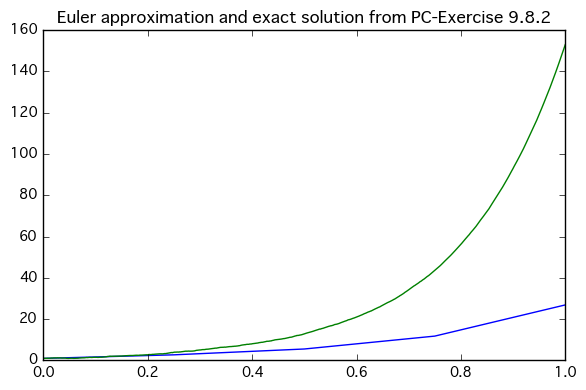

In [35]:
a982 = lambda t,x: 5*x
b982 = lambda t,x: 1
delta982 = 2**(-4)
x0_921 = 1.0
t0_921 = 0
t1_921 = 1

sol921 = lambda t,w: math.exp(t+w.at(t))

W = Wiener(t0_921,t1_921,2**10)
Y = Euler_Maruyama(a982,b982,x0_921,W,delta921)
X = Euler_Maruyama(a982,b982,x0_921,W,2**(-10))

plt.title("Euler approximation and exact solution from PC-Exercise 9.8.2")
Y.show()
X.show()
plt.show()
plt.close()

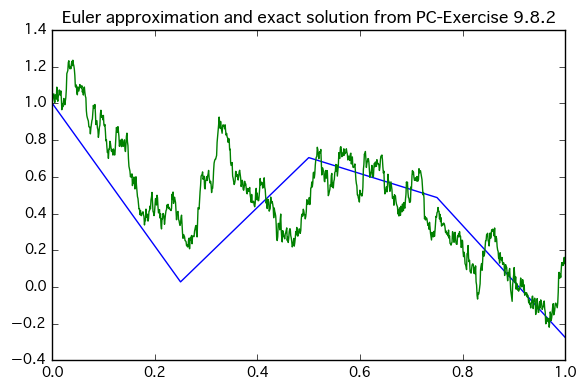

In [36]:
a982 = lambda t,x: -5*x
b982 = lambda t,x: 1
delta982 = 2**(-4)
x0_921 = 1.0
t0_921 = 0
t1_921 = 1

sol921 = lambda t,w: math.exp(t+w.at(t))

W = Wiener(t0_921,t1_921,2**10)
Y = Euler_Maruyama(a982,b982,x0_921,W,delta921)
X = Euler_Maruyama(a982,b982,x0_921,W,2**(-10))

plt.title("Euler approximation and exact solution from PC-Exercise 9.8.2")
Y.show()
X.show()
plt.show()
plt.close()